In [67]:
#load libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vragh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vragh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
#Define the main sentiment analysis function
def sentiment_check(file):
    with open(file, 'r') as myfile:
      file_content = open(file, 'r').read()
    
    #Tokenise the management discussion using NLTK
    file_content_tokenized= nltk.word_tokenize(file_content)
    
    #Create a frequence distribution table of word tokens
    freq=pd.Series(nltk.FreqDist(file_content_tokenized)).sort_values(ascending=False)
    #print('Most popular 10 stop words',freq.iloc[0:10])
    #print('fraction of total word count that are stop words:',freq.iloc[0:10].sum()/freq.sum())
    
    #The top 10 most common words have been identified as stop words. 
    #These are words like: 'The', 'Ok', etc.
    stopwords=pd.Series(freq.iloc[0:10].index)
    

    #Remove stopwords
    file_content_tokenized=pd.Series([x for x in file_content_tokenized if x not in stopwords.values]).str.lower()
    
    # Load Loughran and McDonald dictionaries
    #these dictionaries are specially used for textual analysis of financial statements
    #More details on this in the README.md
    pos = pd.read_csv('LM_pos_words.txt', squeeze=True).str.lower()
    neg = pd.read_csv('LM_neg_words.txt', squeeze=True).str.lower()
    
    
    positive_words= file_content_tokenized.isin(pos).sum()
    negative_words= file_content_tokenized.isin(neg).sum()
    
    #Total Positive & Negative words in the statement
    #("Positive Words:",positive_words)
    #print("Negative Words:",negative_words)
    
    sentiment_score = (positive_words-negative_words)/file_content_tokenized.count()
    print("for",file.rstrip('.txt'),"(positive words - negative words)/total words:",sentiment_score)
    print("for",file.rstrip('.txt'),"negative words/total words:",(negative_words)/file_content_tokenized.count())
    
    #print((positive_words-negative_words)/file_content_tokenized.count())


    nnn_words= pd.DataFrame(file_content_tokenized.isin(['no', 'not', 'never']))
    nnn_words=nnn_words[nnn_words.iloc[:,0]]
    nnn_words['idx']=nnn_words.index.values
    nnn_words['words']=file_content_tokenized[nnn_words['idx']]
    
    pos_after_neg=nnn_words.apply(pos_after_negator,axis=1,args=(pos.values,file_content_tokenized)).dropna()
    print('+ve words after a negator:',pos_after_neg.values)
    print('')
    return sentiment_score;
    

In [69]:

def pos_after_negator(row,pos,file_content_tokenized):
    #pos = pd.read_csv('LM_pos_words.txt', squeeze=True).str.lower()  
    #print(row)
    string = row['words']
    #print(file_content_tokenized.get(row[1]+1,''))
    string+=' '+ str(file_content_tokenized.get(row[1]+1,''))
    if file_content_tokenized.get(row[1]+1,'') in pos:
        return string
    string+=' '+ str(file_content_tokenized.get(row[1]+2,''))
    if file_content_tokenized.get(row[1]+2,'') in pos:
       return string
    
    string+=' '+ str(file_content_tokenized.get(row[1]+3,''))
    if file_content_tokenized.get(row[1]+3,'') in pos:
       return string
   # print(string)
    return None

In [116]:
def driver():
    #I have extracted Management Discussion section from last 5 10K annual reports and placed them in data folder
    path = 'data\\'
    files = [s for s in os.listdir(path) if s.endswith('.txt')]
    year = pd.Series([])
    sentiment = pd.Series([])
    for file in files:
        year = year.append(pd.Series([int(file.split('.')[0])]))
        sentiment = sentiment.append(pd.Series([sentiment_check(path+'\\'+file)]))
    return (year, sentiment)
    

In [117]:
#Run for last 5 years
year, sentiment = driver()

for data\\2018 (positive words - negative words)/total words: 0.0032373684819054227
for data\\2018 negative words/total words: 0.011215169383743786
+ve words after a negator: ['no outstanding' 'not criteria benefit']

for data\\2017 (positive words - negative words)/total words: 0.00250866085294469
for data\\2017 negative words/total words: 0.012065464102257794
+ve words after a negator: ['not only reducing benefit' 'no outstanding' 'no outstanding'
 'not criteria benefit']

for data\\2016 (positive words - negative words)/total words: 0.0015390534821085034
for data\\2016 negative words/total words: 0.012568936770552777
+ve words after a negator: ['not satisfy' 'no outstanding' 'not criteria benefit']

for data\\2015 (positive words - negative words)/total words: -0.00116918040453642
for data\\2015 negative words/total words: 0.013211738571261546
+ve words after a negator: ['not satisfy' 'not satisfy' 'not criteria benefit']

for data\\2014 (positive words - negative words)/total words

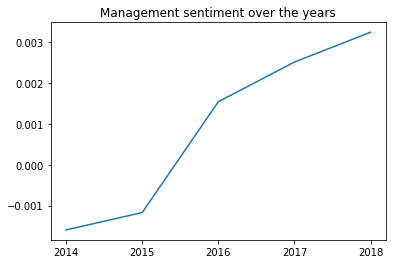

In [125]:
#Plot
f = plt.figure(1)
plt.xticks(year)
plt.xlabel = (year, year)
plt.plot(year,list(sentiment.values))
plt.title('Management sentiment over the years')
plt.show()